In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Homework 1

We want to rebuild the full model using a different dataset. 

In [2]:
inputs = pd.DataFrame({
    'A' : [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5],
    "B" : [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
    "Targets" : [0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1]
})

X = inputs[['A', 'B']]
y = inputs['Targets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [3]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion matrix :\n", confusion_matrix(y_test, y_pred))

print("Prédiction pour A=4, B=5 :", model.predict([[4,5]])[0])

Accuracy : 0.5
Confusion matrix :
 [[1 3]
 [0 2]]
Prédiction pour A=4, B=5 : 1


Equation of hyperplane: 1.30*A + -0.70*B + -0.60 = 0


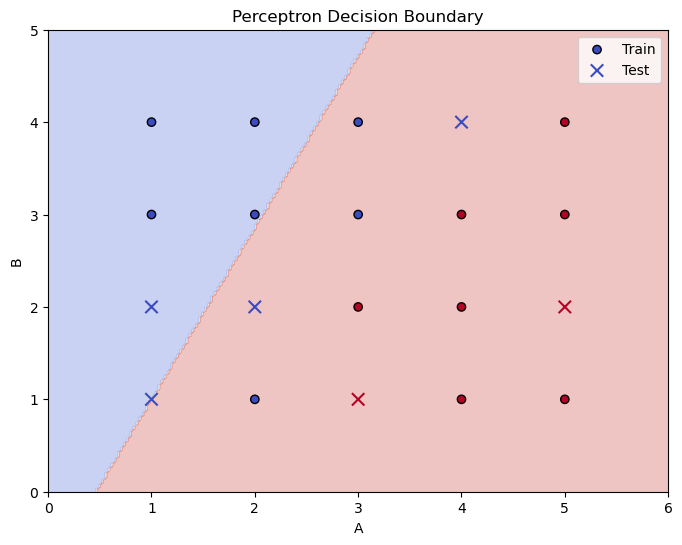

In [4]:
# --- Get weights ---
w = model.coef_[0]
b = model.intercept_[0]

print(f"Equation of hyperplane: {w[0]:.2f}*A + {w[1]:.2f}*B + {b:.2f} = 0")

# --- Plot decision boundary ---
x_min, x_max = X['A'].min() - 1, X['A'].max() + 1
y_min, y_max = X['B'].min() - 1, X['B'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute predictions for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train['A'], X_train['B'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train')
plt.scatter(X_test['A'], X_test['B'], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=80, label='Test')

plt.xlabel('A')
plt.ylabel('B')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

In [5]:
inputs2 = pd.DataFrame({
    "A" : [1,1,0,0],
    "B" : [1,0,0,1],
    "Targets" : [0,1,0,1]
})

In [6]:
X = inputs2[['A', 'B']]
y = inputs2['Targets']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


model2 = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model2.fit(X_train, y_train)


y_pred = model2.predict(X_test)

Equation of hyperplane: -0.30*A + 0.20*B + -0.10 = 0


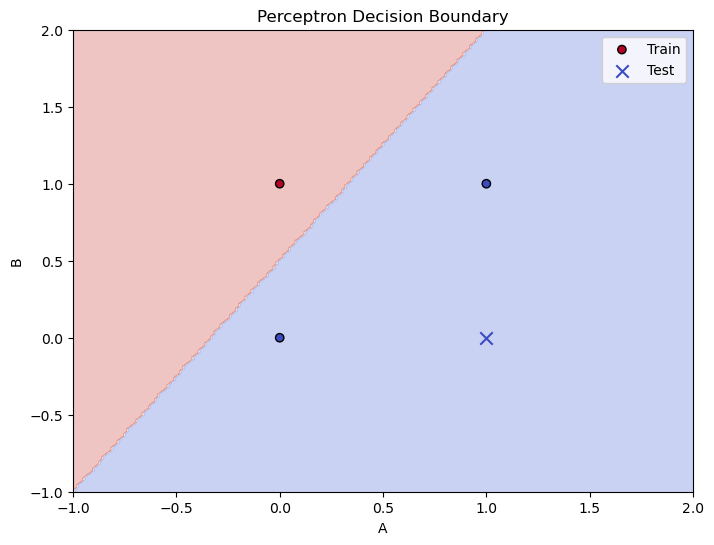

In [7]:
# --- Get weights ---
w = model2.coef_[0]
b = model2.intercept_[0]

print(f"Equation of hyperplane: {w[0]:.2f}*A + {w[1]:.2f}*B + {b:.2f} = 0")

# --- Plot decision boundary ---
x_min, x_max = X['A'].min() - 1, X['A'].max() + 1
y_min, y_max = X['B'].min() - 1, X['B'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute predictions for each grid point
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train['A'], X_train['B'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train')
plt.scatter(X_test['A'], X_test['B'], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=80, label='Test')

plt.xlabel('A')
plt.ylabel('B')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

# Exercise 3

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

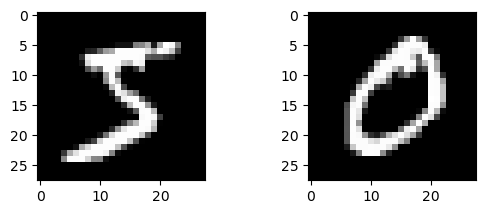

In [4]:
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap("gray"))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap("gray"))
plt.show()

In [5]:
train_labels[0]

5

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
type(train_images)

numpy.ndarray

In [9]:
image_train, image_test = train_images.astype('float32')/255.0, test_images.astype('float32')/255.0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential([
        Flatten(input_shape = (28,28)), 
        Dense(100, activation="relu"), 
        Dense(100,activation="relu"),
        Dense(10, activation="softmax")
    ])
    return model

model = create_model()
model.summary()

2025-10-18 17:12:22.743612: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-18 17:12:22.743638: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-10-18 17:12:22.743643: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-10-18 17:12:22.743654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-18 17:12:22.743662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [12]:
h = model.fit(image_train,train_labels,epochs=20,validation_split=0.2,batch_size=64)

Epoch 1/20
 14/750 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0945 - loss: 2.4327    

2025-10-18 17:12:22.979875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7308 - loss: 0.9745 - val_accuracy: 0.8768 - val_loss: 0.4745
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8767 - loss: 0.4406 - val_accuracy: 0.8957 - val_loss: 0.3693
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8915 - loss: 0.3777 - val_accuracy: 0.9031 - val_loss: 0.3369
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8986 - loss: 0.3521 - val_accuracy: 0.9078 - val_loss: 0.3230
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9029 - loss: 0.3373 - val_accuracy: 0.9098 - val_loss: 0.3138
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9064 - loss: 0.3272 - val_accuracy: 0.9119 - val_loss: 0.3067
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9091 - loss: 0.3199 - val_accuracy: 0.9143 - val_loss: 0.3008
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9109 - loss: 0.3145 - val_accuracy: 0.9162 - val_

In [13]:
def time_decay(epoch, lr, decay=0.01):
    return lr/(1+decay*epoch)

In [14]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer = sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [15]:
h = model.fit(image_train,train_labels,epochs=20,validation_split=0.2,batch_size=64,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(time_decay,verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8299 - loss: 1.2587 - val_accuracy: 0.8797 - val_loss: 0.6559 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009900989877705527.
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7932 - loss: 2.9798 - val_accuracy: 0.8586 - val_loss: 1.8585 - learning_rate: 0.0099

Epoch 3: LearningRateScheduler setting learning rate to 0.009706852884561407.
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7883 - loss: 5.5704 - val_accuracy: 0.8199 - val_loss: 5.2956 - learning_rate: 0.0097

Epoch 4: LearningRateScheduler setting learning rate to 0.009424129085054675.
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7879 - loss: 10.4053 - val_accuracy: 0.8358 - val_loss: 7.5714 - learning_rate: 0.0094

Epoch 5: LearningRateScheduler setting learning rate to 0.0090616629817164

In [16]:
import numpy as np

def exp_decay(epoch,lr):
    k=0.1
    return lr * np.exp(-k * epoch)

In [17]:
model = create_model()

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer = sgd,
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [ ]:
h = model.fit(image_train,train_labels,epochs=20,
              validation_split=0.2, batch_size=64,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(exp_decay, verbose=1)])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7261 - loss: 0.9729 - val_accuracy: 0.8772 - val_loss: 0.4748 - learning_rate: 0.0100
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8784 - loss: 0.4448 - val_accuracy: 0.8983 - val_loss: 0.3719 - learning_rate: 0.0090
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8922 - loss: 0.3835 - val_accuracy: 0.9047 - val_loss: 0.3443 - learning_rate: 0.0074
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8987 - loss: 0.3606 - val_accuracy: 0.9072 - val_loss: 0.3280 - learning_rate: 0.0055
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9013 - loss: 0.3489 - val_accuracy: 0.9090 - val_loss: 0.3215 - learning_rate: 0.0037
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9038 - loss: 0.3425 - val_accuracy: 0.9102 - val_loss: 0.3179 - learning_rate: 0.0022
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9047 - loss: 0.3389 - 

In [20]:
import keras

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
num_classes = test_labels.shape[1]

print(train_labels[0,:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Exercise 5

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler


In [ ]:
inp = np.array([[1,2],[1,2],[1,2]], dtype=np.float32)
trg = np.array([[0.1,0.7],[0.1,0.7],[0.1,0.7]], dtype=np.float32)

In [ ]:
def create_model():
    model = Sequential([
        Dense(4, activation='relu', input_shape=(2,)),
        Dense(2, activation='linear')  # regression output
    ])
    return model

#  Training with a fixed learning rate ---
model_fixed = create_model()
model_fixed.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mse'
)
history_fixed = model_fixed.fit(inp, trg, epochs=50, verbose=0)
print("Final loss (fixed lr):", history_fixed.history['loss'][-1])

Final loss (fixed lr): 1.1328689986100926e-08


In [24]:
# Training with LearningRateScheduler (exponential decay) ---
initial_lr = 0.01
decay = 0.1

def exp_decay(epoch):
    return initial_lr * np.exp(-decay * epoch)

model_sched = create_model()
model_sched.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=initial_lr),
    loss='mse'
)

scheduler = LearningRateScheduler(exp_decay, verbose=1)

history_sched = model_sched.fit(inp, trg, epochs=50, callbacks=[scheduler], verbose=0)
print("Final loss (exp decay lr):", history_sched.history['loss'][-1])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.

Epoch 5: LearningRateScheduler setting learning rate to 0.006703200460356393.

Epoch 6: LearningRateScheduler setting learning rate to 0.006065306597126334.

Epoch 7: LearningRateScheduler setting learning rate to 0.005488116360940264.

Epoch 8: LearningRateScheduler setting learning rate to 0.004965853037914095.

Epoch 9: LearningRateScheduler setting learning rate to 0.004493289641172216.

Epoch 10: LearningRateScheduler setting learning rate to 0.004065696597405992.

Epoch 11: LearningRateScheduler setting learning rate to 0.0036787944117144234.

Epoch 12: LearningRateScheduler setting learning rate to 0.003328710836980796.

Epoch 13: LearningRateScheduler setting learning rate to 0.0030

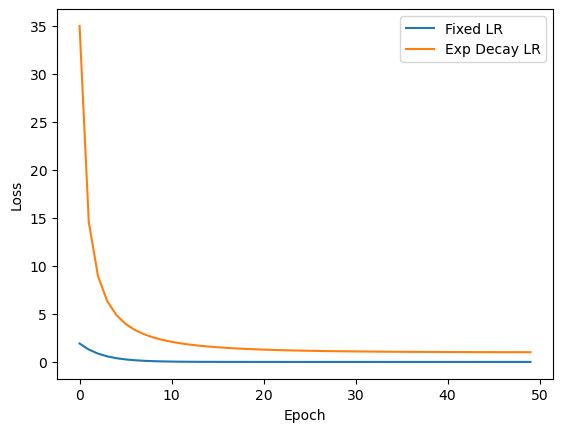

In [25]:
# --- Compare loss curves ---
import matplotlib.pyplot as plt

plt.plot(history_fixed.history['loss'], label='Fixed LR')
plt.plot(history_sched.history['loss'], label='Exp Decay LR')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Homework 3

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
x_train = train_images.astype('float32') / 255.0
x_test = test_images.astype('float32') / 255.0

In [4]:
print("x_train shape:", x_train.shape)  
print("y_train shape:", train_labels.shape)  
print("x_test shape:", x_test.shape)    
print("y_test shape:", test_labels.shape)    

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


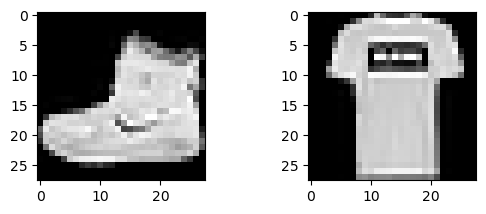

In [5]:
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap("gray"))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap("gray"))
plt.show()

In [6]:
print(train_labels[0], train_labels[1])

9 0


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential([
        Flatten(input_shape = (28,28)), 
        Dense(100, activation="relu"), 
        Dense(100,activation="relu"),
        Dense(10, activation="softmax")
    ])
    return model

model = create_model()
model.summary()

2025-10-20 14:37:53.619339: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-20 14:37:53.619403: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-10-20 14:37:53.619410: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-10-20 14:37:53.619570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-20 14:37:53.619580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
h = model.fit(x_train,train_labels, epochs=20,
              validation_split=0.2, batch_size=64)

Epoch 1/20
 14/750 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1163 - loss: 2.5330    

2025-10-20 14:39:38.200373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6888 - loss: 0.9522 - val_accuracy: 0.7732 - val_loss: 0.6487
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7967 - loss: 0.5960 - val_accuracy: 0.8102 - val_loss: 0.5546
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8168 - loss: 0.5312 - val_accuracy: 0.8196 - val_loss: 0.5130
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8260 - loss: 0.5015 - val_accuracy: 0.8260 - val_loss: 0.4950
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8309 - loss: 0.4845 - val_accuracy: 0.8308 - val_loss: 0.4861
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8374 - loss: 0.4692 - val_accuracy: 0.8368 - val_loss: 0.4691
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8383 - loss: 0.4600 - val_accuracy: 0.8377 - val_loss: 0.4596
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8429 - loss: 0.4527 - val_accuracy: 0.8392 - val_

In [ ]:
loss, accuracy = model.evaluate(x_test, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8233 - loss: 0.4890
Test Loss: 0.4889692962169647
Test Accuracy: 0.8233000040054321


In [18]:
def time_decay(epoch, lr, decay=0.01):
    return lr/(1+decay*epoch)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer = sgd,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

h = model.fit(x_train,train_labels,epochs=20,validation_split=0.2,batch_size=64,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(time_decay,verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8544 - loss: 0.4177 - val_accuracy: 0.8485 - val_loss: 0.4364 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009900989877705527.
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8566 - loss: 0.4153 - val_accuracy: 0.8523 - val_loss: 0.4284 - learning_rate: 0.0099

Epoch 3: LearningRateScheduler setting learning rate to 0.009706852884561407.
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8546 - loss: 0.4174 - val_accuracy: 0.8463 - val_loss: 0.4435 - learning_rate: 0.0097

Epoch 4: LearningRateScheduler setting learning rate to 0.009424129085054675.
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8558 - loss: 0.4166 - val_accuracy: 0.8503 - val_loss: 0.4331 - learning_rate: 0.0094

Epoch 5: LearningRateScheduler setting learning rate to 0.00906166298171648

In [19]:
loss, accuracy = model.evaluate(x_test, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.4513
Test Loss: 0.4513247013092041
Test Accuracy: 0.8413000106811523


In [22]:
def exp_decay(epoch,lr):
    k=0.1
    return lr * np.exp(-k * epoch)

model = create_model()

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer = sgd,
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

h = model.fit(x_train,train_labels,epochs=20,
              validation_split=0.2, batch_size=64,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(exp_decay, verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6838 - loss: 0.9484 - val_accuracy: 0.7870 - val_loss: 0.6408 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048373978112673.
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7976 - loss: 0.6005 - val_accuracy: 0.8084 - val_loss: 0.5566 - learning_rate: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.007408182361869137.
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8155 - loss: 0.5413 - val_accuracy: 0.8141 - val_loss: 0.5305 - learning_rate: 0.0074

Epoch 4: LearningRateScheduler setting learning rate to 0.005488116309006892.
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8240 - loss: 0.5145 - val_accuracy: 0.8147 - val_loss: 0.5148 - learning_rate: 0.0055

Epoch 5: LearningRateScheduler setting learning rate to 0.00367879436694061

In [23]:
loss, accuracy = model.evaluate(x_test, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8198 - loss: 0.5163
Test Loss: 0.5163252949714661
Test Accuracy: 0.8198000192642212


In [24]:
import keras

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
num_classes = test_labels.shape[1]

print(train_labels[0,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
